# 수치 미분

In [10]:
import numpy as np

### 1차원 함수의 수치 미분

In [2]:
def f(x):
    return x ** 2

def analytical_d(x):
    return 2 * x

def num_d_foward(x, h=1e-5):
    return (f(x + h) - f(x)) / h

def num_d_backward(x, h=1e-5):
    return (f(x) - f(x - h)) / h

def num_d_central(x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

x = 3.0

print(analytical_d(x))
print(num_d_foward(x))
print(num_d_backward(x))
print(num_d_central(x))

6.0
6.000009999951316
5.999990000127297
6.000000000039306


### 다변수 함수의 수치 미분

In [6]:
# 편미분
def partial_d(x, y):
    return x ** 2 + y ** 2

def partial_d(f, x, y, var='x', h=1e-5):
    if var == 'x':
        return (f(x + h) - f(x - h)) / (2 * h)
    else:
        return (f(y + h) - f(y - h)) / (2 * h)
    
partial_d(f, 3.0, 2.0, var='x'), partial_d(f, 3.0, 2.0, var='y')

(6.000000000039306, 4.000000000026205)

In [19]:
def f_multi(x):
    return np.sum(x ** 2)

def analytical_d_gradient(x):
    return 2 * x

def num_d_gradient(f, x, h=1e-5):
    grad = np.zeros_like(x)
    # for i in range(x.size):
    #     grad[i] = (f(x + h) - f(x - h)) / (2 * h)
    for i in range(len(x)):
        grad[i] = (f(x[i] + h) - f(x[i] - h)) / (2 * h)
    return grad
    

In [20]:
x = np.array([1.0, 2.0, 3.0])

print(analytical_d_gradient(x))
print(num_d_gradient(f_multi, x))

[2. 4. 6.]
[2. 4. 6.]


### 간단한 신경망의 기울기

In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_pass(x, params):
    w1, b1, w2, b2 = params
    a1 = np.dot(w1, x) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(w2, z1) + b2
    z2 = sigmoid(a2)
    return z2

def loss(r2, y):
    return 0.5 * np.sum((r2 - y) ** 2)

def get_loss(params, x, y):
    r2 = forward_pass(x, params)
    return loss(r2, y)

def num_d_gradient_params(f, params, x, y, h=1e-5):
    # for param in params:
    #     grad = np.zeros_like(param)
    #     for i in range(len(param)):
    #         param[i] += h
    #         loss_plus = f(params, x, y)
    #         param[i] -= 2 * h
    #         loss_minus = f(params, x, y)
    #         grad[i] = (loss_plus - loss_minus) / (2 * h)
    #         param[i] += h
    grads = []
    for param in params:
        grad = np.zeros_like(param)
        iter = np.nditer(param, flags=['multi_index'], op_flags=['readwrite'])
        
        while not iter.finished:
            idx = iter.multi_index
            origin_val = param[idx]
            param[idx] = origin_val + h
            loss_plus = f(params, x, y)
            param[idx] = origin_val - h
            loss_minus = f(params, x, y)
            grad[idx] = (loss_plus - loss_minus) / (2 * h)
            param[idx] = origin_val
            iter.iternext()
        grads.append(grad)
    return grads

np.random.seed(0)
input_size = 2
hidden_size = 3
output_size = 1

W1 = np.random.randn(hidden_size, input_size)
b1 = np.random.randn(hidden_size)
W2 = np.random.randn(output_size, hidden_size)
b2 = np.random.randn(output_size)

params = [W1, b1, W2, b2]

x = np.array([.5, -.2])
y = np.array([1.0])

num_grads = num_d_gradient_params(get_loss, params, x, y)
num_grads
for i, grad in enumerate(num_grads):
    print(f'{i}th param 수치 기울기')
    print(grad)

0th param 수치 기울기
[[-2.12816501e-04  8.51266004e-05]
 [-1.47749525e-04  5.90998106e-05]
 [-1.16248258e-03  4.64993033e-04]]
1th param 수치 기울기
[-0.00042563 -0.0002955  -0.00232497]
2th param 수치 기울기
[[-0.00701437 -0.00388891 -0.006059  ]]
3th param 수치 기울기
[-0.00823075]


### h 값에 따른 영향

In [28]:
def f(x):
    return x ** 2

def analytical_d(x):
    return 2 * x

def num_d_central(x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

x = 3.0
h_values = np.logspace(-10, -1, 50)
errors = []

trud_d = analytical_d(x)
for h in h_values:
    num_d = num_d_central(x, h)
    error = np.abs(trud_d - num_d)
    errors.append(error)

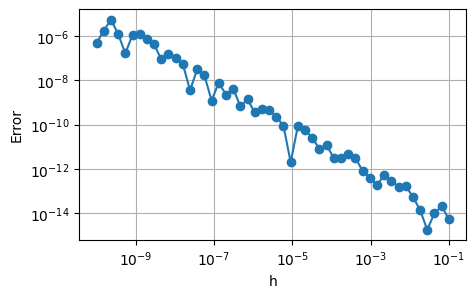

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
plt.loglog(h_values, errors, marker='o')
plt.xlabel('h')
plt.ylabel('Error')
plt.grid(True)
plt.show()

### 자동 미분

In [ ]:
import torch

x = torch.tensor(3.0, requires_grad=True)
y = f(x)
y.backward()

print(analytical_d(3.0))
print(x.grad)